# SA1-28 BAYQUEN **2x2 Between-Subjects ANOVA**
Github link: https://github.com/notfolded/APM1220/blob/main/SA1-28.ipynb

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

In [3]:
# loading the dataset

diet_df = pd.read_csv("/content/drive/MyDrive/Applied Multivariate Data Anlysis/Diet Type and Exercise Intensity on Weight Loss.csv")
diet_df.head()

,Participant,Diet Type,Exercise Intensity,Weight Loss (kg)
0,1,Low-Carb,Low Intensity,2.5
1,2,Low-Carb,Low Intensity,2.8
2,3,Low-Carb,Low Intensity,2.9
3,4,Low-Carb,Low Intensity,3.0
4,5,Low-Carb,Low Intensity,2.7


# **Assumption Validation**

**Normality Assumption**

In [7]:
# Normality check using Shapiro-Wilk test
for group in diet_df.groupby(['Diet Type', 'Exercise Intensity']):
    stat, p_value = stats.shapiro(group[1]['Weight Loss (kg)'])
    print(f'Shapiro-Wilk test for {group[0]}: p-value = {p_value}')

Shapiro-Wilk test for ('Low-Carb', 'High Intensity'): p-value = 0.7539729964660309
Shapiro-Wilk test for ('Low-Carb', 'Low Intensity'): p-value = 0.9276364233495382
Shapiro-Wilk test for ('Low-Fat', 'High Intensity'): p-value = 0.9671739349728593
Shapiro-Wilk test for ('Low-Fat', 'Low Intensity'): p-value = 0.9671739349728582


The p-values from the Shapiro-Wilk test for all groups are greater than 0.05, indicating that the weight loss data in each group follows a normal distribution. This means the normality assumption is satisfied.

**Independence Assumption**

There is no relationship between the observations in each group of the independent variable or between the groups themselves—the values of the weight in each observation are independent of each other.

**Homogeneity of Variance Assumption**

Levene's test for homogeneity of variances: p-value = 0.6065196636713183


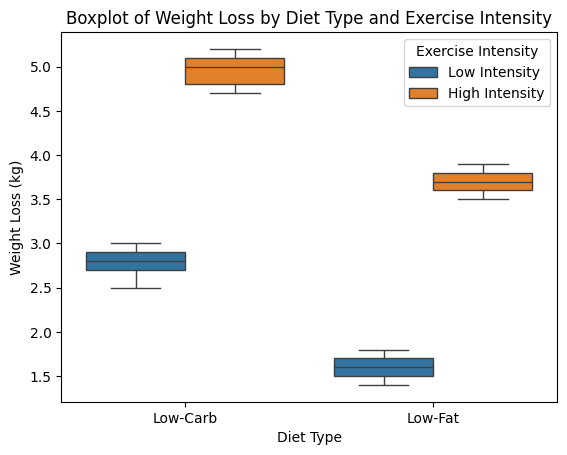

In [12]:
# Homogeneity of variance using Levene's test
stat, p_value = stats.levene(diet_df[diet_df['Diet Type'] == 'Low-Carb']['Weight Loss (kg)'],
                             diet_df[diet_df['Diet Type'] == 'Low-Fat']['Weight Loss (kg)'])
print(f"Levene's test for homogeneity of variances: p-value = {p_value}")

# Visual check: boxplot for homogeneity of variance
sns.boxplot(x='Diet Type', y='Weight Loss (kg)', hue='Exercise Intensity', data=diet_df)
plt.title("Boxplot of Weight Loss by Diet Type and Exercise Intensity")
plt.show()

The p-value from Levene’s test is 0.6065, which is greater than 0.05. This suggests that the variances between the groups are not significantly different, meeting the homogeneity of variance assumption.

# **Performing the 2x2 ANOVA**

In [13]:
model = ols('Weight_Loss ~ C(Diet_Type) * C(Exercise_Intensity)', data=diet_df.rename(columns={'Weight Loss (kg)': 'Weight_Loss',
                                                                                            'Diet Type': 'Diet_Type',
                                                                                            'Exercise Intensity': 'Exercise_Intensity'})).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                    sum_sq    df           F        PR(>F)
C(Diet_Type)                         7.442   1.0  228.984615  6.697960e-11
C(Exercise_Intensity)               22.898   1.0  704.553846  1.172348e-14
C(Diet_Type):C(Exercise_Intensity)   0.008   1.0    0.246154  6.265427e-01
Residual                             0.520  16.0         NaN           NaN


**The Main Effect of Diet**

The effect of diet type (Low-Carb vs. Low-Fat) on weight loss is **statistically significant** having a **p-value < .001**. The low p-value indicates that there is a significant difference in weight loss between participants on a Low-Carb diet and those on a Low-Fat diet.

**The Main Effect of Exercise Intensity**

The effect of exercise intensity (Low Intensity vs. High Intensity) on weight loss is also **statistically significant** having a **p-value <  0.001**. This suggests that exercise intensity significantly affects the amount of weight loss.

**Interaction between Diet type and Exercise Intensity**

The interaction effect between diet type and exercise intensity is **not statistically significant**, having a **p-value = 0.06265 ; p > 0.05**. This implies that the effect of diet type on weight loss does not depend on the exercise intensity, and vice versa.

**Post-hoc Test**

In [14]:
# Post-hoc test using Tukey's HSD
tukey = pairwise_tukeyhsd(endog=diet_df['Weight Loss (kg)'],
                          groups=diet_df['Diet Type'] + ' & ' + diet_df['Exercise Intensity'],
                          alpha=0.05)
print(tukey)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
          group1                   group2          meandiff p-adj  lower   upper  reject
----------------------------------------------------------------------------------------
Low-Carb & High Intensity Low-Carb & Low Intensity    -2.18   0.0 -2.5062 -1.8538   True
Low-Carb & High Intensity Low-Fat & High Intensity    -1.26   0.0 -1.5862 -0.9338   True
Low-Carb & High Intensity  Low-Fat & Low Intensity    -3.36   0.0 -3.6862 -3.0338   True
 Low-Carb & Low Intensity Low-Fat & High Intensity     0.92   0.0  0.5938  1.2462   True
 Low-Carb & Low Intensity  Low-Fat & Low Intensity    -1.18   0.0 -1.5062 -0.8538   True
 Low-Fat & High Intensity  Low-Fat & Low Intensity     -2.1   0.0 -2.4262 -1.7738   True
----------------------------------------------------------------------------------------


The Tukey HSD test reveals that all pairwise comparisons between the diet and exercise groups show significant differences (p < .05).

- **Low-Carb & High Intensity vs. Low-Carb & Low Intensity**: The mean difference is -2.18, indicating that high-intensity exercise results in significantly more weight loss than low-intensity exercise in the Low-Carb diet group.

- **Low-Carb & High Intensity vs. Low-Fat & High Intensity**: The mean difference is -1.26, suggesting that even with high-intensity exercise, participants on the Low-Carb diet lose more weight than those on the Low-Fat diet.

- **Low-Carb & High Intensity vs. Low-Fat & Low Intensity**: The mean difference of -3.36 suggests that participants on a Low-Carb, high-intensity regime lose significantly more weight than those on a Low-Fat, low-intensity regime.

- **Other Pairwise Comparisons**: The rest of the comparisons also show significant differences, with weight loss being greater for participants engaging in higher intensity exercise or those following a Low-Carb diet.